In [103]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

#  import and read data set

In [104]:
df = pd.read_csv('Sales.csv')

In [105]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [4]:
df.shape

(113036, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

#  this data not null values

In [6]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [7]:
df.nunique()

Date                1884
Day                   31
Month                 12
Year                   6
Customer_Age          70
Age_Group              4
Customer_Gender        2
Country                6
State                 53
Product_Category       3
Sub_Category          17
Product              130
Order_Quantity        32
Unit_Cost             34
Unit_Price            36
Profit              1256
Cost                 360
Revenue             1876
dtype: int64

In [8]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# convert date to datetime

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object

In [11]:
df.isna().values.any()

False

Discover and remove duplicate values

In [12]:
df.duplicated().values.any()

True

In [13]:
df.duplicated().sum()

1000

In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 113036, dtype: bool

In [15]:
df = df.drop_duplicates()
df.shape

(112036, 18)

In [16]:
df.duplicated().values.any()

False

# remove some columns and replace

In [17]:
df = df.drop(['Profit', 'Cost', 'Revenue'], axis =1)

In [18]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64


In [19]:
df['Total_Cost'] = df['Order_Quantity'] * df['Unit_Cost']
df['Revenue'] = df['Order_Quantity'] * df['Unit_Price']
df['Profit'] = df['Revenue'] - df['Total_Cost']
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1035,2760,1725
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,900,2400,1500
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,180,480,300


In [20]:
df.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Total_Cost                   int64
Revenue                      int64
Profit                       int64
dtype: object

# create new data frame

In [21]:
bike = df.select_dtypes(exclude=['object','datetime']).copy()

In [22]:
bike

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit
0,26,2013,19,8,45,120,360,960,600
1,26,2015,19,8,45,120,360,960,600
2,23,2014,49,23,45,120,1035,2760,1725
3,23,2016,49,20,45,120,900,2400,1500
4,15,2014,47,4,45,120,180,480,300
...,...,...,...,...,...,...,...,...,...
113031,12,2016,41,3,24,64,72,192,120
113032,2,2014,18,22,24,64,528,1408,880
113033,2,2016,18,22,24,64,528,1408,880
113034,4,2014,37,24,24,64,576,1536,960


# add some feature in new data frame

In [23]:
bike['Customer_Age'] = df['Customer_Age']

In [24]:
bike['Customer_Gender'] = df['Customer_Gender']

In [25]:
bike['Country'] = df['Country']

In [26]:
bike['Product_Category'] = df['Product_Category']

In [27]:
bike

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit,Customer_Gender,Country,Product_Category
0,26,2013,19,8,45,120,360,960,600,M,Canada,Accessories
1,26,2015,19,8,45,120,360,960,600,M,Canada,Accessories
2,23,2014,49,23,45,120,1035,2760,1725,M,Australia,Accessories
3,23,2016,49,20,45,120,900,2400,1500,M,Australia,Accessories
4,15,2014,47,4,45,120,180,480,300,F,Australia,Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12,2016,41,3,24,64,72,192,120,M,United Kingdom,Clothing
113032,2,2014,18,22,24,64,528,1408,880,M,Australia,Clothing
113033,2,2016,18,22,24,64,528,1408,880,M,Australia,Clothing
113034,4,2014,37,24,24,64,576,1536,960,F,France,Clothing


# use dummies for convert object

In [28]:
bike = pd.get_dummies(bike)

In [29]:
bike

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
0,26,2013,19,8,45,120,360,960,600,0,1,0,1,0,0,0,0,1,0,0
1,26,2015,19,8,45,120,360,960,600,0,1,0,1,0,0,0,0,1,0,0
2,23,2014,49,23,45,120,1035,2760,1725,0,1,1,0,0,0,0,0,1,0,0
3,23,2016,49,20,45,120,900,2400,1500,0,1,1,0,0,0,0,0,1,0,0
4,15,2014,47,4,45,120,180,480,300,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12,2016,41,3,24,64,72,192,120,0,1,0,0,0,0,1,0,0,0,1
113032,2,2014,18,22,24,64,528,1408,880,0,1,1,0,0,0,0,0,0,0,1
113033,2,2016,18,22,24,64,528,1408,880,0,1,1,0,0,0,0,0,0,0,1
113034,4,2014,37,24,24,64,576,1536,960,1,0,0,0,1,0,0,0,0,0,1


In [30]:
bike.shape

(112036, 20)

In [31]:
bike.columns

Index(['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Total_Cost', 'Revenue', 'Profit', 'Customer_Gender_F',
       'Customer_Gender_M', 'Country_Australia', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_United Kingdom',
       'Country_United States', 'Product_Category_Accessories',
       'Product_Category_Bikes', 'Product_Category_Clothing'],
      dtype='object')

In [32]:
bike.shape

(112036, 20)

# Train , Validation , Test

In [33]:
X, y = bike.drop('Profit',axis=1), bike['Profit']


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=100)

In [35]:
X_train_val

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
34965,13,2016,62,3,13,35,39,105,0,1,0,0,0,0,0,1,1,0,0
87667,3,2016,26,16,2,5,32,80,1,0,1,0,0,0,0,0,1,0,0
41461,9,2016,41,4,13,35,52,140,0,1,0,0,0,0,0,1,1,0,0
49369,4,2016,50,3,1912,3400,5736,10200,1,0,1,0,0,0,0,0,0,1,0
46176,7,2014,28,25,38,50,950,1250,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65964,17,2013,33,1,344,540,344,540,0,1,0,0,0,0,0,1,0,1,0
78126,31,2013,26,4,2,5,8,20,1,0,1,0,0,0,0,0,1,0,0
80191,22,2016,42,23,2,5,46,115,0,1,0,0,0,0,1,0,1,0,0
56364,29,2014,30,1,308,565,308,565,0,1,0,0,1,0,0,0,0,1,0


In [36]:
len(X_train_val.index)

89628

In [37]:
y_train_val

34965      66
87667      48
41461      88
49369    4464
46176     300
         ... 
65964     196
78126      12
80191      69
56364     257
38644     308
Name: Profit, Length: 89628, dtype: int64

In [38]:
len(y_train_val.index)

89628

In [39]:
len(X_test)

22408

In [40]:
len(y_test)

22408

In [41]:
X_train_val.index

Int64Index([34965, 87667, 41461, 49369, 46176, 17731, 80105, 68438,  2987,
            35398,
            ...
            76054, 14455, 82815, 63707, 82373, 65964, 78126, 80191, 56364,
            38644],
           dtype='int64', length=89628)

In [42]:
X_test.index

Int64Index([ 15717,  24462,  93532,  60870,  42346,   5564,  94406,  38746,
             62168,  16950,
            ...
            104477,  25371,   7370,  30671,  52287,  22808,  59647,   4559,
             49197,   9249],
           dtype='int64', length=22408)

In [43]:
X_train

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
39912,15,2014,40,8,13,35,104,280,0,1,0,0,0,0,0,1,1,0,0
9320,8,2015,23,31,2,5,62,155,1,0,0,0,0,0,0,1,1,0,0
39026,17,2013,46,11,13,35,143,385,1,0,0,1,0,0,0,0,1,0,0
70114,7,2012,27,2,487,783,974,1566,0,1,0,1,0,0,0,0,0,1,0
111043,9,2015,19,1,1482,2384,1482,2384,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65964,17,2013,33,1,344,540,344,540,0,1,0,0,0,0,0,1,0,1,0
78126,31,2013,26,4,2,5,8,20,1,0,1,0,0,0,0,0,1,0,0
80191,22,2016,42,23,2,5,46,115,0,1,0,0,0,0,1,0,1,0,0
56364,29,2014,30,1,308,565,308,565,0,1,0,0,1,0,0,0,0,1,0


In [44]:
y_train

39912     176
9320       93
39026     242
70114     592
111043    902
         ... 
65964     196
78126      12
80191      69
56364     257
38644     308
Name: Profit, Length: 84027, dtype: int64

# use LinearRegression model

In [45]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
lm.score(X_train,y_train)

1.0

In [47]:
lm.score(X_val,y_val)

1.0

In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [49]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 1.000
Ridge Regression val R^2: 1.000
Degree 2 polynomial regression val R^2: 1.000


In [50]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 1.000


# after regression split data frame to df_train and df_test

In [51]:
df_train,df_test = train_test_split(df)

In [52]:
df_train

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit
86864,2014-02-28,28,February,2014,44,Adults (35-64),M,Germany,Nordrhein-Westfalen,Accessories,Tires and Tubes,HL Mountain Tire,4,13,35,52,140,88
35740,2013-09-18,18,September,2013,53,Adults (35-64),F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",1,13,35,13,35,22
103595,2016-03-24,24,March,2016,23,Youth (<25),M,United States,California,Accessories,Tires and Tubes,Touring Tire Tube,10,2,5,20,50,30
72905,2016-03-23,23,March,2016,34,Young Adults (25-34),F,United States,Washington,Clothing,Shorts,"Women's Mountain Shorts, L",15,26,70,390,1050,660
67032,2014-06-04,4,June,2014,48,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 48",1,2171,3578,2171,3578,1407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41008,2013-08-26,26,August,2013,39,Adults (35-64),M,United States,California,Accessories,Helmets,"Sport-100 Helmet, Black",24,13,35,312,840,528
30013,2015-10-31,31,October,2015,40,Adults (35-64),F,United Kingdom,England,Accessories,Helmets,"Sport-100 Helmet, Red",23,13,35,299,805,506
22029,2015-09-19,19,September,2015,41,Adults (35-64),F,Canada,British Columbia,Accessories,Cleaners,Bike Wash - Dissolver,12,3,8,36,96,60
9425,2014-07-08,8,July,2014,57,Adults (35-64),F,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1,2,5,2,5,3


In [53]:
df_train.groupby(['Country'])['Profit'].sum()

Country
Australia          8116937
Canada             2830477
France             3294785
Germany            3264410
United Kingdom     3619092
United States     10421894
Name: Profit, dtype: int64

In [54]:
df_train.Product_Category.unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [55]:
df_train.Sub_Category.unique()

array(['Tires and Tubes', 'Helmets', 'Shorts', 'Road Bikes',
       'Bottles and Cages', 'Touring Bikes', 'Jerseys', 'Gloves',
       'Mountain Bikes', 'Fenders', 'Caps', 'Hydration Packs', 'Socks',
       'Bike Racks', 'Bike Stands', 'Vests', 'Cleaners'], dtype=object)

In [56]:
df_train.groupby(['Country'])['Revenue'].sum()

Country
Australia         18918863
Canada             5992948
France             7567273
Germany            7458672
United Kingdom     8259877
United States     23101628
Name: Revenue, dtype: int64

# EDA for dataset

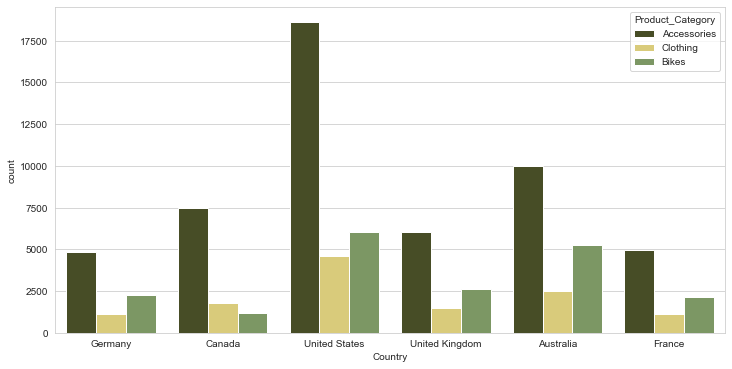

In [108]:
df_train.groupby(['Country', 'Product_Category'])['Revenue'].sum()
sns.countplot(data = df_train, x='Country', hue='Product_Category', palette=['#4B5320','#E9D66B','#7BA05B'])
plt.gcf().set_size_inches(12,6)

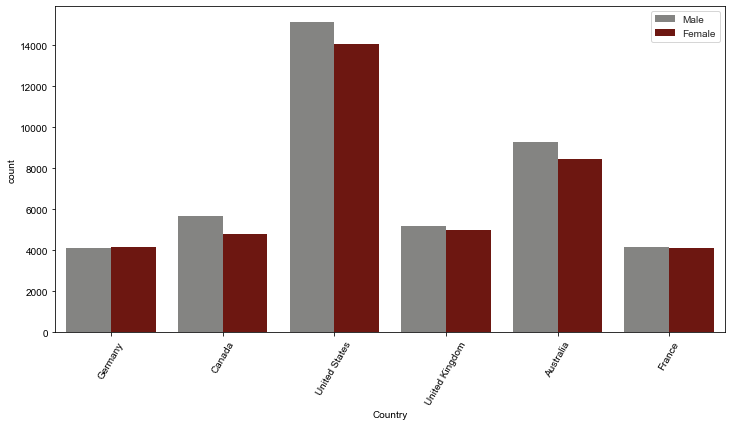

In [61]:
sns.countplot(data = df_train, x='Country', hue='Customer_Gender', palette=['#848482','#7C0A02'])
plt.xticks(rotation=60)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(12,6)
plt.show()

In [62]:
df_age = df_train['Customer_Age'].value_counts()

In [63]:
df_age

31    3277
34    3203
29    3133
32    3035
33    2984
      ... 
79       5
80       5
86       5
87       4
82       3
Name: Customer_Age, Length: 70, dtype: int64

In [81]:
mask =df_train[df_train['Product_Category']=='Bikes']
mask

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit
67032,2014-06-04,4,June,2014,48,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 48",1,2171,3578,2171,3578,1407
111820,2014-04-26,26,April,2014,51,Adults (35-64),M,Australia,Victoria,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,461,742,281
64604,2014-04-03,3,April,2014,55,Adults (35-64),F,United States,California,Bikes,Road Bikes,"Road-550-W Yellow, 48",1,713,1120,713,1120,407
53279,2015-12-13,13,December,2015,27,Young Adults (25-34),F,United States,Washington,Bikes,Mountain Bikes,"Mountain-400-W Silver, 38",1,420,769,420,769,349
49869,2015-09-15,15,September,2015,31,Young Adults (25-34),F,Germany,Hessen,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,1266,2320,1054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64579,2015-12-14,14,December,2015,43,Adults (35-64),F,United States,Oregon,Bikes,Road Bikes,"Road-550-W Yellow, 44",2,713,1120,1426,2240,814
69450,2013-01-01,1,January,2013,27,Young Adults (25-34),F,Australia,New South Wales,Bikes,Road Bikes,"Road-550-W Yellow, 48",1,713,1120,713,1120,407
53662,2013-02-05,5,February,2013,28,Young Adults (25-34),F,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,1252,2295,1043
55157,2016-03-28,28,March,2016,40,Adults (35-64),F,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",3,420,769,1260,2307,1047


In [101]:
rs = mask.groupby('Customer_Gender')['Sub_Category'].value_counts()
rs

Customer_Gender  Sub_Category  
F                Road Bikes        4896
                 Mountain Bikes    3355
                 Touring Bikes     1381
M                Road Bikes        5145
                 Mountain Bikes    3257
                 Touring Bikes     1400
Name: Sub_Category, dtype: int64

<AxesSubplot:xlabel='Sub_Category', ylabel='count'>

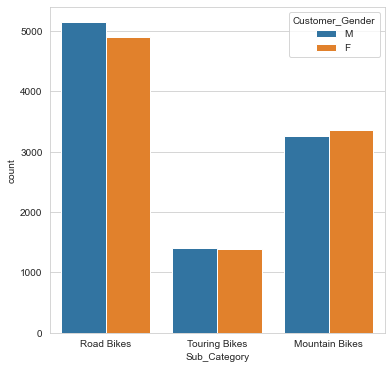

In [116]:
fig, rs = plt.subplots(figsize=(6,6))
rs = mask.groupby('Customer_Gender')['Sub_Category'].value_counts()
sns.countplot(data = mask, x='Sub_Category', hue='Customer_Gender')

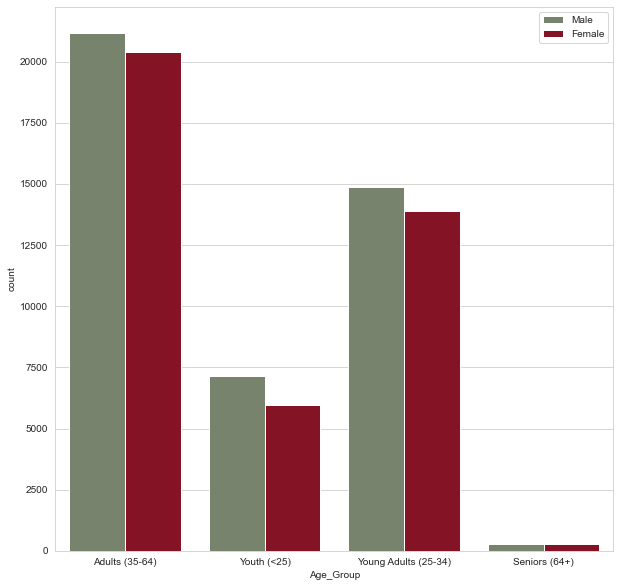

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [110]:
sns.countplot(data = df_train, x='Age_Group', hue='Customer_Gender', palette=['#78866B','#960018'])
plt.xticks(rotation=0)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(10,10)
plt.show()
plt.figure(figsize=(10,10))

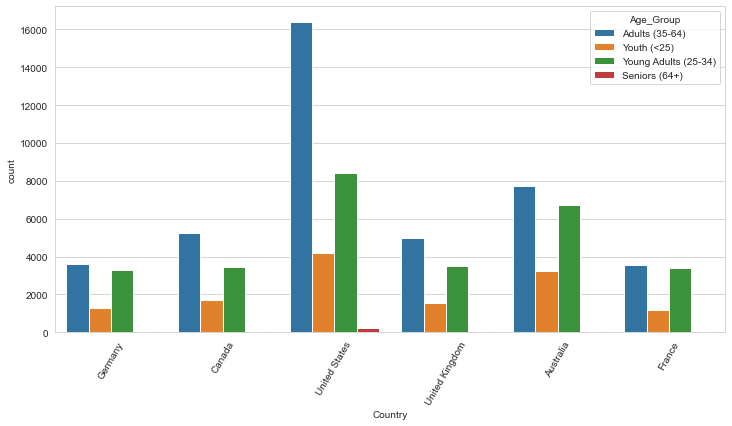

In [65]:
sns.countplot(data = df_train, x='Country', hue='Age_Group')
plt.xticks(rotation=60)
sns.set_style("whitegrid")

plt.gcf().set_size_inches(12,6)
plt.show()

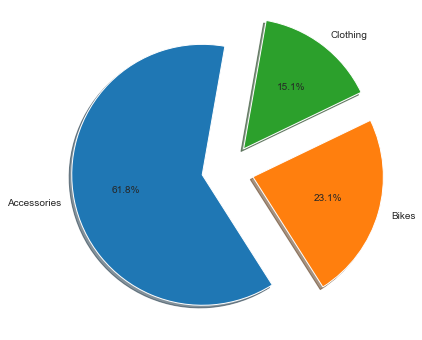

In [66]:
df_product = df_train['Product_Category'].value_counts()

label= [df_product.index.tolist()]
plt.pie(df_product, shadow=True, labels=label[0], explode=(0.2, 0.2, 0.2), autopct='%1.1f%%', startangle=80)
plt.gcf().set_size_inches(12,6)
plt.show()

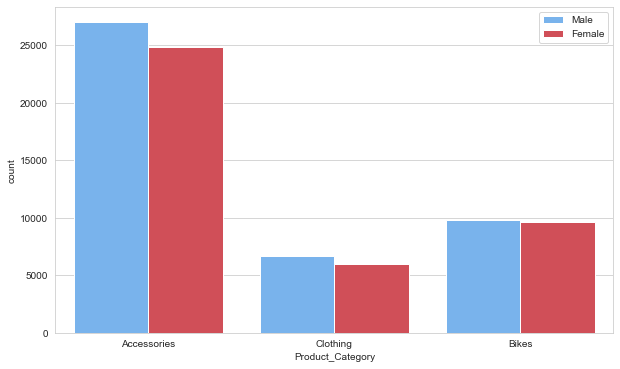

In [111]:
sns.countplot(data = df_train, x='Product_Category', hue='Customer_Gender', palette=['#66b3ff','#E63946'])
plt.xticks(rotation=0)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(10,6)
plt.show()

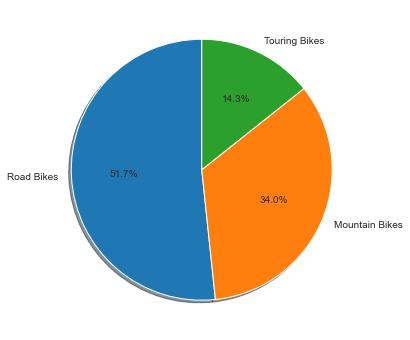

In [68]:
df_Bikes = df_train[df['Product_Category'] == 'Bikes']

df_Bikes = df_Bikes['Sub_Category'].value_counts()

label = [df_Bikes.index.tolist()]
plt.pie(df_Bikes, shadow=True, autopct='%1.1f%%', startangle=90, labels=label[0])
plt.gcf().set_size_inches(12,6)
plt.show()

In [117]:
da = mask.groupby('Country')['Sub_Category','Unit_Price'].max()
da

,Sub_Category,Unit_Price
Country,,
Australia,Touring Bikes,3578
Canada,Touring Bikes,3578
France,Touring Bikes,3578
Germany,Touring Bikes,3578
United Kingdom,Touring Bikes,3578
United States,Touring Bikes,3578


In [120]:
most_years = mask.groupby('Year')['Sub_Category','Unit_Price'].sum()
most_years

,Unit_Price
Year,
2011,3879779
2012,3842111
2013,8197466
2014,6314846
2015,8214213
2016,6440622


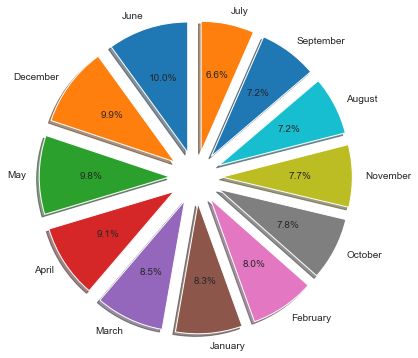

In [71]:
df_product_month = df_train['Month'].value_counts()

label= [df_product_month.index.tolist()]
plt.pie(df_product_month, shadow=True, labels=label[0], explode=(0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2),
        autopct='%1.1f%%', startangle=90)
plt.gcf().set_size_inches(12,6)
plt.show()

[Text(0.5, 0, 'Profit'), Text(0, 0.5, 'Country')]

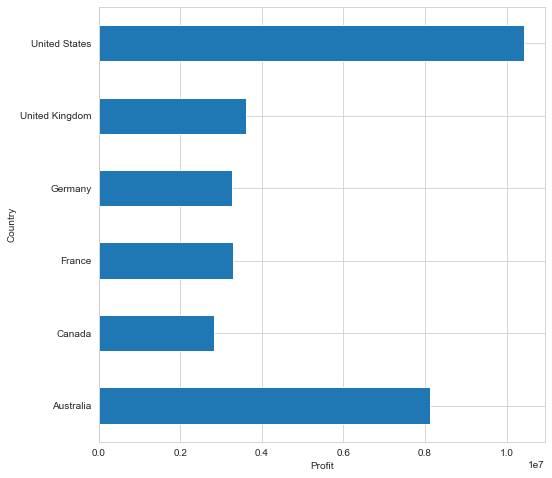

In [73]:
plt.figure(figsize=(8,8))
ax = df_train.groupby('Country')['Profit'].sum().plot(kind='barh')
ax.set(xlabel='Profit', ylabel='Country')

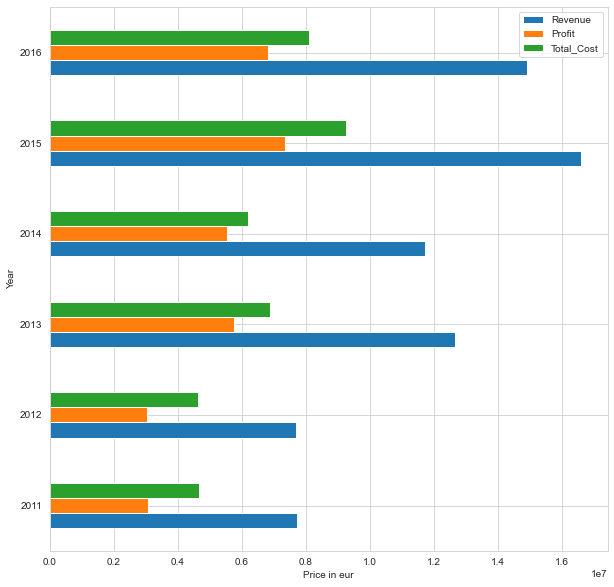

In [74]:
ax = df_train.groupby('Year')['Revenue', 'Profit', 'Total_Cost'].sum().plot(kind='barh')
ax.set(xlabel='Price in eur', ylabel='Year')
plt.gcf().set_size_inches(10,10)


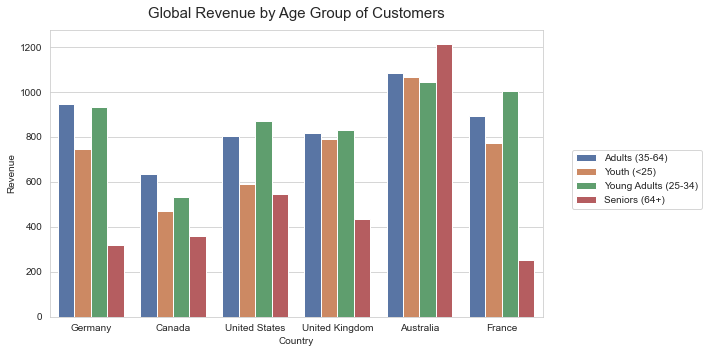

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= df_train, x='Country', y='Revenue', hue='Age_Group',palette='deep',alpha=1,ci=None, ax=ax)
plt.title('Global Revenue by Age Group of Customers',fontdict={'fontsize': 15}, y=1.02)
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.tight_layout()
plt.show()

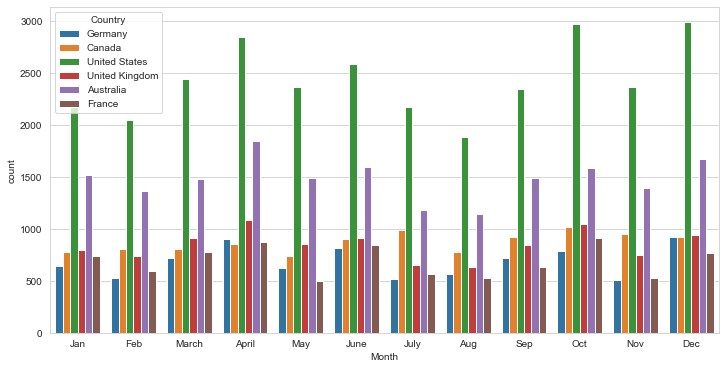

In [76]:
# Check sales by season and country

label = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(data = df_train, x='Month', hue='Country')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=label)
sns.set_style("whitegrid")
plt.gcf().set_size_inches(12,6)
plt.show()